# Prerequisites

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math, random
random.seed = 0
from pathlib import Path
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import*
from tensorflow.keras.callbacks import EarlyStopping
from math import exp
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F

# Classification base on images

In [590]:
path = Path("Z:\Comp Projects\ML\ModelNet10_test")
path_img = Path("Z:\Comp Projects\ML\ModelNet10_img")
folders = [dir for dir in sorted(os.listdir(path)) if os.path.isdir(path/dir)]
classes = {folder: i for i, folder in enumerate(folders)}
classes_list = ["Bathtub","Bed","Chair","Desk","Dresser","Monitor","Night Stand","Sofa","Table","Toilet"]
self_classes = classes
self_classes["nightstand"] = self_classes.pop("night_stand")
classes

{'bathtub': 0,
 'bed': 1,
 'chair': 2,
 'desk': 3,
 'dresser': 4,
 'monitor': 5,
 'sofa': 7,
 'table': 8,
 'toilet': 9,
 'nightstand': 6}

In [188]:
def read_off(file):
    if 'OFF' != file.readline().strip():
        raise('Not a valid OFF header')
    n_verts, n_faces, __ = tuple([int(s) for s in file.readline().strip().split(' ')])
    verts = [[float(s) for s in file.readline().strip().split(' ')] for i_vert in range(n_verts)]
    faces = [[int(s) for s in file.readline().strip().split(' ')][1:] for i_face in range(n_faces)]
    return verts, faces

In [333]:
def conv_imag(v,f, name, save_path=path_img):    
    i,j,k = np.array(f).T
    x,y,z = np.array(v).T
    data = go.Mesh3d(x=x, y=y, z=z, color='lightgray', i=i,j=j,k=k)
    fig = go.Figure(data=data)
    camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=-0.25, z=-0.175),
        eye=dict(x=-1.25, y=-1.5, z=1.25)
    )
    fig.update_layout(scene_camera=camera)
    fig.update_layout(scene = dict(
                        xaxis = dict(
                             nticks=1,
                             backgroundcolor="rgb(256,256,256)",
                             gridcolor="white",
                             showbackground=True,
                             zerolinecolor="white",),
                        yaxis = dict(
                            nticks=1,
                            backgroundcolor="rgb(256,256,256)",
                            gridcolor="white",
                            showbackground=True,
                            zerolinecolor="white"),
                        zaxis = dict(
                            nticks=1,
                            backgroundcolor="rgb(256,256,256)",
                            gridcolor="white",
                            showbackground=True,
                            zerolinecolor="white",),),
                        width=700,
                        margin=dict(
                        r=0, l=0,
                        b=0, t=0)
                      )
    fig.write_image(save_path/name)
    #img_bytes = fig.to_image(format="png")
    #fig.show()

In [227]:
train_folders = []
all_train_files = []
for folder in folders:
    train_folders.append(Path(path/folder/"train"))
for train_folder in train_folders:
    files = [ file_path  for _, _,file_path in os.walk(train_folder)]
    all_train_files.append(files)

In [228]:
test_folders = []
all_test_files = []
for folder in folders:
    test_folders.append(path/folder/"test")
#print(test_folders)
for folder in test_folders:
    files = [ file_path  for _, _,file_path in os.walk(folder)]
    all_test_files.append(files)

In [229]:
train_folders

[WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/bathtub/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/bed/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/chair/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/desk/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/dresser/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/monitor/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/night_stand/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/sofa/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/table/train'),
 WindowsPath('Z:/Comp Projects/ML/ModelNet10_test/toilet/train')]

In [230]:
train_folders=np.array(train_folders)
all_train_files=np.array(all_train_files)
all_train_files[0][0][0]

'bathtub_0001.off'

In [231]:
for i in range(len(train_folders)):
    print('Progress [%4d / %4d]' % (i+1, len(train_folders)))
    #print(test_folders[i])
    train_path = train_folders[i]
    cat_files = [f for f in os.listdir(train_path)if os.path.isfile(os.path.join(train_path, f))]
    num_files = len(cat_files)
    for j in range(num_files):
        file_path = Path(train_folders[i]/cat_files[j])
        with open(file_path, 'r') as f:
            v, f = read_off(f)
        name="train_"+str(i)+"_"+str(j)+".png"
        #print(name)
        conv_imag(v,f,name)
        

Progress [   1 /   10]
train_0_0.png
train_0_1.png
train_0_2.png
train_0_3.png
train_0_4.png
train_0_5.png
train_0_6.png
train_0_7.png
train_0_8.png
train_0_9.png
train_0_10.png
train_0_11.png
train_0_12.png
train_0_13.png
train_0_14.png
train_0_15.png
train_0_16.png
train_0_17.png
train_0_18.png
train_0_19.png
train_0_20.png
train_0_21.png
train_0_22.png
train_0_23.png
train_0_24.png
train_0_25.png
train_0_26.png
train_0_27.png
train_0_28.png
train_0_29.png
train_0_30.png
train_0_31.png
train_0_32.png
train_0_33.png
train_0_34.png
train_0_35.png
train_0_36.png
train_0_37.png
train_0_38.png
train_0_39.png
train_0_40.png
train_0_41.png
train_0_42.png
train_0_43.png
train_0_44.png
train_0_45.png
train_0_46.png
train_0_47.png
train_0_48.png
train_0_49.png
train_0_50.png
train_0_51.png
train_0_52.png
train_0_53.png
train_0_54.png
train_0_55.png
train_0_56.png
train_0_57.png
train_0_58.png
train_0_59.png
train_0_60.png
train_0_61.png
train_0_62.png
train_0_63.png
train_0_64.png
train_0_65.p

train_1_417.png
train_1_418.png
train_1_419.png
train_1_420.png
train_1_421.png
train_1_422.png
train_1_423.png
train_1_424.png
train_1_425.png
train_1_426.png
train_1_427.png
train_1_428.png
train_1_429.png
train_1_430.png
train_1_431.png
train_1_432.png
train_1_433.png
train_1_434.png
train_1_435.png
train_1_436.png
train_1_437.png
train_1_438.png
train_1_439.png
train_1_440.png
train_1_441.png
train_1_442.png
train_1_443.png
train_1_444.png
train_1_445.png
train_1_446.png
train_1_447.png
train_1_448.png
train_1_449.png
train_1_450.png
train_1_451.png
train_1_452.png
train_1_453.png
train_1_454.png
train_1_455.png
train_1_456.png
train_1_457.png
train_1_458.png
train_1_459.png
train_1_460.png
train_1_461.png
train_1_462.png
train_1_463.png
train_1_464.png
train_1_465.png
train_1_466.png
train_1_467.png
train_1_468.png
train_1_469.png
train_1_470.png
train_1_471.png
train_1_472.png
train_1_473.png
train_1_474.png
train_1_475.png
train_1_476.png
train_1_477.png
train_1_478.png
train_1_

train_2_420.png
train_2_421.png
train_2_422.png
train_2_423.png
train_2_424.png
train_2_425.png
train_2_426.png
train_2_427.png
train_2_428.png
train_2_429.png
train_2_430.png
train_2_431.png
train_2_432.png
train_2_433.png
train_2_434.png
train_2_435.png
train_2_436.png
train_2_437.png
train_2_438.png
train_2_439.png
train_2_440.png
train_2_441.png
train_2_442.png
train_2_443.png
train_2_444.png
train_2_445.png
train_2_446.png
train_2_447.png
train_2_448.png
train_2_449.png
train_2_450.png
train_2_451.png
train_2_452.png
train_2_453.png
train_2_454.png
train_2_455.png
train_2_456.png
train_2_457.png
train_2_458.png
train_2_459.png
train_2_460.png
train_2_461.png
train_2_462.png
train_2_463.png
train_2_464.png
train_2_465.png
train_2_466.png
train_2_467.png
train_2_468.png
train_2_469.png
train_2_470.png
train_2_471.png
train_2_472.png
train_2_473.png
train_2_474.png
train_2_475.png
train_2_476.png
train_2_477.png
train_2_478.png
train_2_479.png
train_2_480.png
train_2_481.png
train_2_

train_3_46.png
train_3_47.png
train_3_48.png
train_3_49.png
train_3_50.png
train_3_51.png
train_3_52.png
train_3_53.png
train_3_54.png
train_3_55.png
train_3_56.png
train_3_57.png
train_3_58.png
train_3_59.png
train_3_60.png
train_3_61.png
train_3_62.png
train_3_63.png
train_3_64.png
train_3_65.png
train_3_66.png
train_3_67.png
train_3_68.png
train_3_69.png
train_3_70.png
train_3_71.png
train_3_72.png
train_3_73.png
train_3_74.png
train_3_75.png
train_3_76.png
train_3_77.png
train_3_78.png
train_3_79.png
train_3_80.png
train_3_81.png
train_3_82.png
train_3_83.png
train_3_84.png
train_3_85.png
train_3_86.png
train_3_87.png
train_3_88.png
train_3_89.png
train_3_90.png
train_3_91.png
train_3_92.png
train_3_93.png
train_3_94.png
train_3_95.png
train_3_96.png
train_3_97.png
train_3_98.png
train_3_99.png
train_3_100.png
train_3_101.png
train_3_102.png
train_3_103.png
train_3_104.png
train_3_105.png
train_3_106.png
train_3_107.png
train_3_108.png
train_3_109.png
train_3_110.png
train_3_111.pn

train_5_173.png
train_5_174.png
train_5_175.png
train_5_176.png
train_5_177.png
train_5_178.png
train_5_179.png
train_5_180.png
train_5_181.png
train_5_182.png
train_5_183.png
train_5_184.png
train_5_185.png
train_5_186.png
train_5_187.png
train_5_188.png
train_5_189.png
train_5_190.png
train_5_191.png
train_5_192.png
train_5_193.png
train_5_194.png
train_5_195.png
train_5_196.png
train_5_197.png
train_5_198.png
train_5_199.png
train_5_200.png
train_5_201.png
train_5_202.png
train_5_203.png
train_5_204.png
train_5_205.png
train_5_206.png
train_5_207.png
train_5_208.png
train_5_209.png
train_5_210.png
train_5_211.png
train_5_212.png
train_5_213.png
train_5_214.png
train_5_215.png
train_5_216.png
train_5_217.png
train_5_218.png
train_5_219.png
train_5_220.png
train_5_221.png
train_5_222.png
train_5_223.png
train_5_224.png
train_5_225.png
train_5_226.png
train_5_227.png
train_5_228.png
train_5_229.png
train_5_230.png
train_5_231.png
train_5_232.png
train_5_233.png
train_5_234.png
train_5_

train_7_27.png
train_7_28.png
train_7_29.png
train_7_30.png
train_7_31.png
train_7_32.png
train_7_33.png
train_7_34.png
train_7_35.png
train_7_36.png
train_7_37.png
train_7_38.png
train_7_39.png
train_7_40.png
train_7_41.png
train_7_42.png
train_7_43.png
train_7_44.png
train_7_45.png
train_7_46.png
train_7_47.png
train_7_48.png
train_7_49.png
train_7_50.png
train_7_51.png
train_7_52.png
train_7_53.png
train_7_54.png
train_7_55.png
train_7_56.png
train_7_57.png
train_7_58.png
train_7_59.png
train_7_60.png
train_7_61.png
train_7_62.png
train_7_63.png
train_7_64.png
train_7_65.png
train_7_66.png
train_7_67.png
train_7_68.png
train_7_69.png
train_7_70.png
train_7_71.png
train_7_72.png
train_7_73.png
train_7_74.png
train_7_75.png
train_7_76.png
train_7_77.png
train_7_78.png
train_7_79.png
train_7_80.png
train_7_81.png
train_7_82.png
train_7_83.png
train_7_84.png
train_7_85.png
train_7_86.png
train_7_87.png
train_7_88.png
train_7_89.png
train_7_90.png
train_7_91.png
train_7_92.png
train_7_93

train_7_544.png
train_7_545.png
train_7_546.png
train_7_547.png
train_7_548.png
train_7_549.png
train_7_550.png
train_7_551.png
train_7_552.png
train_7_553.png
train_7_554.png
train_7_555.png
train_7_556.png
train_7_557.png
train_7_558.png
train_7_559.png
train_7_560.png
train_7_561.png
train_7_562.png
train_7_563.png
train_7_564.png
train_7_565.png
train_7_566.png
train_7_567.png
train_7_568.png
train_7_569.png
train_7_570.png
train_7_571.png
train_7_572.png
train_7_573.png
train_7_574.png
train_7_575.png
train_7_576.png
train_7_577.png
train_7_578.png
train_7_579.png
train_7_580.png
train_7_581.png
train_7_582.png
train_7_583.png
train_7_584.png
train_7_585.png
train_7_586.png
train_7_587.png
train_7_588.png
train_7_589.png
train_7_590.png
train_7_591.png
train_7_592.png
train_7_593.png
train_7_594.png
train_7_595.png
train_7_596.png
train_7_597.png
train_7_598.png
train_7_599.png
train_7_600.png
train_7_601.png
train_7_602.png
train_7_603.png
train_7_604.png
train_7_605.png
train_7_

train_8_382.png
train_8_383.png
train_8_384.png
train_8_385.png
train_8_386.png
train_8_387.png
train_8_388.png
train_8_389.png
train_8_390.png
train_8_391.png
Progress [  10 /   10]
train_9_0.png
train_9_1.png
train_9_2.png
train_9_3.png
train_9_4.png
train_9_5.png
train_9_6.png
train_9_7.png
train_9_8.png
train_9_9.png
train_9_10.png
train_9_11.png
train_9_12.png
train_9_13.png
train_9_14.png
train_9_15.png
train_9_16.png
train_9_17.png
train_9_18.png
train_9_19.png
train_9_20.png
train_9_21.png
train_9_22.png
train_9_23.png
train_9_24.png
train_9_25.png
train_9_26.png
train_9_27.png
train_9_28.png
train_9_29.png
train_9_30.png
train_9_31.png
train_9_32.png
train_9_33.png
train_9_34.png
train_9_35.png
train_9_36.png
train_9_37.png
train_9_38.png
train_9_39.png
train_9_40.png
train_9_41.png
train_9_42.png
train_9_43.png
train_9_44.png
train_9_45.png
train_9_46.png
train_9_47.png
train_9_48.png
train_9_49.png
train_9_50.png
train_9_51.png
train_9_52.png
train_9_53.png
train_9_54.png
tr

In [265]:
for i in range(len(test_folders)):
    print('Progress [%4d / %4d]' % (i+1, len(test_folders)))
    #print(test_folders[i])
    test_path = test_folders[i]
    num_files = len([f for f in os.listdir(test_path)if os.path.isfile(os.path.join(test_path, f))])
    #print(num_files)
    for j in range(num_files):
        file_path = Path(test_folders[i]/all_test_files[i][0][j])
        with open(file_path, 'r') as f:
            v, f = read_off(f)
        name="test_"+str(i)+"_"+str(j)+".png"
        #print(name)
        conv_imag(v,f,name)

Progress [   1 /   10]
test_0_0.png
test_0_1.png
test_0_2.png
test_0_3.png
test_0_4.png
test_0_5.png
test_0_6.png
test_0_7.png
test_0_8.png
test_0_9.png
test_0_10.png
test_0_11.png
test_0_12.png
test_0_13.png
test_0_14.png
test_0_15.png
test_0_16.png
test_0_17.png
test_0_18.png
test_0_19.png
test_0_20.png
test_0_21.png
test_0_22.png
test_0_23.png
test_0_24.png
test_0_25.png
test_0_26.png
test_0_27.png
test_0_28.png
test_0_29.png
test_0_30.png
test_0_31.png
test_0_32.png
test_0_33.png
test_0_34.png
test_0_35.png
test_0_36.png
test_0_37.png
test_0_38.png
test_0_39.png
test_0_40.png
test_0_41.png
test_0_42.png
test_0_43.png
test_0_44.png
test_0_45.png
test_0_46.png
test_0_47.png
test_0_48.png
test_0_49.png
Progress [   2 /   10]
test_1_0.png
test_1_1.png
test_1_2.png
test_1_3.png
test_1_4.png
test_1_5.png
test_1_6.png
test_1_7.png
test_1_8.png
test_1_9.png
test_1_10.png
test_1_11.png
test_1_12.png
test_1_13.png
test_1_14.png
test_1_15.png
test_1_16.png
test_1_17.png
test_1_18.png
test_1_1

test_6_57.png
test_6_58.png
test_6_59.png
test_6_60.png
test_6_61.png
test_6_62.png
test_6_63.png
test_6_64.png
test_6_65.png
test_6_66.png
test_6_67.png
test_6_68.png
test_6_69.png
test_6_70.png
test_6_71.png
test_6_72.png
test_6_73.png
test_6_74.png
test_6_75.png
test_6_76.png
test_6_77.png
test_6_78.png
test_6_79.png
test_6_80.png
test_6_81.png
test_6_82.png
test_6_83.png
test_6_84.png
test_6_85.png
Progress [   8 /   10]
test_7_0.png
test_7_1.png
test_7_2.png
test_7_3.png
test_7_4.png
test_7_5.png
test_7_6.png
test_7_7.png
test_7_8.png
test_7_9.png
test_7_10.png
test_7_11.png
test_7_12.png
test_7_13.png
test_7_14.png
test_7_15.png
test_7_16.png
test_7_17.png
test_7_18.png
test_7_19.png
test_7_20.png
test_7_21.png
test_7_22.png
test_7_23.png
test_7_24.png
test_7_25.png
test_7_26.png
test_7_27.png
test_7_28.png
test_7_29.png
test_7_30.png
test_7_31.png
test_7_32.png
test_7_33.png
test_7_34.png
test_7_35.png
test_7_36.png
test_7_37.png
test_7_38.png
test_7_39.png
test_7_40.png
test_7_

In [266]:
all_images = np.array([f for f in os.listdir(path_img)if os.path.isfile(os.path.join(path_img, f))])
X_train = []
y_train = []
X_test = []
y_test = []
i=1

for image in all_images:
    print('Progress [%4d / %4d]' % (i, len(all_images)))
    image_split=image.split("_")
    if image_split[0]=="train":
        img = plt.imread(path_img/image)
        resize_img = resize(img, (32,32))
        X_train.append(resize_img)
        y_train.append(image_split[1])
        i=i+1
    if image_split[0]=="test":
        img = plt.imread(path_img/image)
        resize_img = resize(img, (32,32,1))
        X_test.append(resize_img)
        y_test.append(image_split[1])
        i=i+1
X_train = np.array(X_train)
y_train = np.array(list(map(int, y_train)))
X_test = np.array(X_test)
y_test = np.array(list(map(int, y_test)))

Progress [   1 / 4899]
Progress [   2 / 4899]
Progress [   3 / 4899]
Progress [   4 / 4899]
Progress [   5 / 4899]
Progress [   6 / 4899]
Progress [   7 / 4899]
Progress [   8 / 4899]
Progress [   9 / 4899]
Progress [  10 / 4899]
Progress [  11 / 4899]
Progress [  12 / 4899]
Progress [  13 / 4899]
Progress [  14 / 4899]
Progress [  15 / 4899]
Progress [  16 / 4899]
Progress [  17 / 4899]
Progress [  18 / 4899]
Progress [  19 / 4899]
Progress [  20 / 4899]
Progress [  21 / 4899]
Progress [  22 / 4899]
Progress [  23 / 4899]
Progress [  24 / 4899]
Progress [  25 / 4899]
Progress [  26 / 4899]
Progress [  27 / 4899]
Progress [  28 / 4899]
Progress [  29 / 4899]
Progress [  30 / 4899]
Progress [  31 / 4899]
Progress [  32 / 4899]
Progress [  33 / 4899]
Progress [  34 / 4899]
Progress [  35 / 4899]
Progress [  36 / 4899]
Progress [  37 / 4899]
Progress [  38 / 4899]
Progress [  39 / 4899]
Progress [  40 / 4899]
Progress [  41 / 4899]
Progress [  42 / 4899]
Progress [  43 / 4899]
Progress [ 

Progress [ 714 / 4899]
Progress [ 715 / 4899]
Progress [ 716 / 4899]
Progress [ 717 / 4899]
Progress [ 718 / 4899]
Progress [ 719 / 4899]
Progress [ 720 / 4899]
Progress [ 721 / 4899]
Progress [ 722 / 4899]
Progress [ 723 / 4899]
Progress [ 724 / 4899]
Progress [ 725 / 4899]
Progress [ 726 / 4899]
Progress [ 727 / 4899]
Progress [ 728 / 4899]
Progress [ 729 / 4899]
Progress [ 730 / 4899]
Progress [ 731 / 4899]
Progress [ 732 / 4899]
Progress [ 733 / 4899]
Progress [ 734 / 4899]
Progress [ 735 / 4899]
Progress [ 736 / 4899]
Progress [ 737 / 4899]
Progress [ 738 / 4899]
Progress [ 739 / 4899]
Progress [ 740 / 4899]
Progress [ 741 / 4899]
Progress [ 742 / 4899]
Progress [ 743 / 4899]
Progress [ 744 / 4899]
Progress [ 745 / 4899]
Progress [ 746 / 4899]
Progress [ 747 / 4899]
Progress [ 748 / 4899]
Progress [ 749 / 4899]
Progress [ 750 / 4899]
Progress [ 751 / 4899]
Progress [ 752 / 4899]
Progress [ 753 / 4899]
Progress [ 754 / 4899]
Progress [ 755 / 4899]
Progress [ 756 / 4899]
Progress [ 

Progress [1428 / 4899]
Progress [1429 / 4899]
Progress [1430 / 4899]
Progress [1431 / 4899]
Progress [1432 / 4899]
Progress [1433 / 4899]
Progress [1434 / 4899]
Progress [1435 / 4899]
Progress [1436 / 4899]
Progress [1437 / 4899]
Progress [1438 / 4899]
Progress [1439 / 4899]
Progress [1440 / 4899]
Progress [1441 / 4899]
Progress [1442 / 4899]
Progress [1443 / 4899]
Progress [1444 / 4899]
Progress [1445 / 4899]
Progress [1446 / 4899]
Progress [1447 / 4899]
Progress [1448 / 4899]
Progress [1449 / 4899]
Progress [1450 / 4899]
Progress [1451 / 4899]
Progress [1452 / 4899]
Progress [1453 / 4899]
Progress [1454 / 4899]
Progress [1455 / 4899]
Progress [1456 / 4899]
Progress [1457 / 4899]
Progress [1458 / 4899]
Progress [1459 / 4899]
Progress [1460 / 4899]
Progress [1461 / 4899]
Progress [1462 / 4899]
Progress [1463 / 4899]
Progress [1464 / 4899]
Progress [1465 / 4899]
Progress [1466 / 4899]
Progress [1467 / 4899]
Progress [1468 / 4899]
Progress [1469 / 4899]
Progress [1470 / 4899]
Progress [1

Progress [1787 / 4899]
Progress [1788 / 4899]
Progress [1789 / 4899]
Progress [1790 / 4899]
Progress [1791 / 4899]
Progress [1792 / 4899]
Progress [1793 / 4899]
Progress [1794 / 4899]
Progress [1795 / 4899]
Progress [1796 / 4899]
Progress [1797 / 4899]
Progress [1798 / 4899]
Progress [1799 / 4899]
Progress [1800 / 4899]
Progress [1801 / 4899]
Progress [1802 / 4899]
Progress [1803 / 4899]
Progress [1804 / 4899]
Progress [1805 / 4899]
Progress [1806 / 4899]
Progress [1807 / 4899]
Progress [1808 / 4899]
Progress [1809 / 4899]
Progress [1810 / 4899]
Progress [1811 / 4899]
Progress [1812 / 4899]
Progress [1813 / 4899]
Progress [1814 / 4899]
Progress [1815 / 4899]
Progress [1816 / 4899]
Progress [1817 / 4899]
Progress [1818 / 4899]
Progress [1819 / 4899]
Progress [1820 / 4899]
Progress [1821 / 4899]
Progress [1822 / 4899]
Progress [1823 / 4899]
Progress [1824 / 4899]
Progress [1825 / 4899]
Progress [1826 / 4899]
Progress [1827 / 4899]
Progress [1828 / 4899]
Progress [1829 / 4899]
Progress [1

Progress [2144 / 4899]
Progress [2145 / 4899]
Progress [2146 / 4899]
Progress [2147 / 4899]
Progress [2148 / 4899]
Progress [2149 / 4899]
Progress [2150 / 4899]
Progress [2151 / 4899]
Progress [2152 / 4899]
Progress [2153 / 4899]
Progress [2154 / 4899]
Progress [2155 / 4899]
Progress [2156 / 4899]
Progress [2157 / 4899]
Progress [2158 / 4899]
Progress [2159 / 4899]
Progress [2160 / 4899]
Progress [2161 / 4899]
Progress [2162 / 4899]
Progress [2163 / 4899]
Progress [2164 / 4899]
Progress [2165 / 4899]
Progress [2166 / 4899]
Progress [2167 / 4899]
Progress [2168 / 4899]
Progress [2169 / 4899]
Progress [2170 / 4899]
Progress [2171 / 4899]
Progress [2172 / 4899]
Progress [2173 / 4899]
Progress [2174 / 4899]
Progress [2175 / 4899]
Progress [2176 / 4899]
Progress [2177 / 4899]
Progress [2178 / 4899]
Progress [2179 / 4899]
Progress [2180 / 4899]
Progress [2181 / 4899]
Progress [2182 / 4899]
Progress [2183 / 4899]
Progress [2184 / 4899]
Progress [2185 / 4899]
Progress [2186 / 4899]
Progress [2

Progress [2502 / 4899]
Progress [2503 / 4899]
Progress [2504 / 4899]
Progress [2505 / 4899]
Progress [2506 / 4899]
Progress [2507 / 4899]
Progress [2508 / 4899]
Progress [2509 / 4899]
Progress [2510 / 4899]
Progress [2511 / 4899]
Progress [2512 / 4899]
Progress [2513 / 4899]
Progress [2514 / 4899]
Progress [2515 / 4899]
Progress [2516 / 4899]
Progress [2517 / 4899]
Progress [2518 / 4899]
Progress [2519 / 4899]
Progress [2520 / 4899]
Progress [2521 / 4899]
Progress [2522 / 4899]
Progress [2523 / 4899]
Progress [2524 / 4899]
Progress [2525 / 4899]
Progress [2526 / 4899]
Progress [2527 / 4899]
Progress [2528 / 4899]
Progress [2529 / 4899]
Progress [2530 / 4899]
Progress [2531 / 4899]
Progress [2532 / 4899]
Progress [2533 / 4899]
Progress [2534 / 4899]
Progress [2535 / 4899]
Progress [2536 / 4899]
Progress [2537 / 4899]
Progress [2538 / 4899]
Progress [2539 / 4899]
Progress [2540 / 4899]
Progress [2541 / 4899]
Progress [2542 / 4899]
Progress [2543 / 4899]
Progress [2544 / 4899]
Progress [2

Progress [2861 / 4899]
Progress [2862 / 4899]
Progress [2863 / 4899]
Progress [2864 / 4899]
Progress [2865 / 4899]
Progress [2866 / 4899]
Progress [2867 / 4899]
Progress [2868 / 4899]
Progress [2869 / 4899]
Progress [2870 / 4899]
Progress [2871 / 4899]
Progress [2872 / 4899]
Progress [2873 / 4899]
Progress [2874 / 4899]
Progress [2875 / 4899]
Progress [2876 / 4899]
Progress [2877 / 4899]
Progress [2878 / 4899]
Progress [2879 / 4899]
Progress [2880 / 4899]
Progress [2881 / 4899]
Progress [2882 / 4899]
Progress [2883 / 4899]
Progress [2884 / 4899]
Progress [2885 / 4899]
Progress [2886 / 4899]
Progress [2887 / 4899]
Progress [2888 / 4899]
Progress [2889 / 4899]
Progress [2890 / 4899]
Progress [2891 / 4899]
Progress [2892 / 4899]
Progress [2893 / 4899]
Progress [2894 / 4899]
Progress [2895 / 4899]
Progress [2896 / 4899]
Progress [2897 / 4899]
Progress [2898 / 4899]
Progress [2899 / 4899]
Progress [2900 / 4899]
Progress [2901 / 4899]
Progress [2902 / 4899]
Progress [2903 / 4899]
Progress [2

Progress [3219 / 4899]
Progress [3220 / 4899]
Progress [3221 / 4899]
Progress [3222 / 4899]
Progress [3223 / 4899]
Progress [3224 / 4899]
Progress [3225 / 4899]
Progress [3226 / 4899]
Progress [3227 / 4899]
Progress [3228 / 4899]
Progress [3229 / 4899]
Progress [3230 / 4899]
Progress [3231 / 4899]
Progress [3232 / 4899]
Progress [3233 / 4899]
Progress [3234 / 4899]
Progress [3235 / 4899]
Progress [3236 / 4899]
Progress [3237 / 4899]
Progress [3238 / 4899]
Progress [3239 / 4899]
Progress [3240 / 4899]
Progress [3241 / 4899]
Progress [3242 / 4899]
Progress [3243 / 4899]
Progress [3244 / 4899]
Progress [3245 / 4899]
Progress [3246 / 4899]
Progress [3247 / 4899]
Progress [3248 / 4899]
Progress [3249 / 4899]
Progress [3250 / 4899]
Progress [3251 / 4899]
Progress [3252 / 4899]
Progress [3253 / 4899]
Progress [3254 / 4899]
Progress [3255 / 4899]
Progress [3256 / 4899]
Progress [3257 / 4899]
Progress [3258 / 4899]
Progress [3259 / 4899]
Progress [3260 / 4899]
Progress [3261 / 4899]
Progress [3

Progress [3577 / 4899]
Progress [3578 / 4899]
Progress [3579 / 4899]
Progress [3580 / 4899]
Progress [3581 / 4899]
Progress [3582 / 4899]
Progress [3583 / 4899]
Progress [3584 / 4899]
Progress [3585 / 4899]
Progress [3586 / 4899]
Progress [3587 / 4899]
Progress [3588 / 4899]
Progress [3589 / 4899]
Progress [3590 / 4899]
Progress [3591 / 4899]
Progress [3592 / 4899]
Progress [3593 / 4899]
Progress [3594 / 4899]
Progress [3595 / 4899]
Progress [3596 / 4899]
Progress [3597 / 4899]
Progress [3598 / 4899]
Progress [3599 / 4899]
Progress [3600 / 4899]
Progress [3601 / 4899]
Progress [3602 / 4899]
Progress [3603 / 4899]
Progress [3604 / 4899]
Progress [3605 / 4899]
Progress [3606 / 4899]
Progress [3607 / 4899]
Progress [3608 / 4899]
Progress [3609 / 4899]
Progress [3610 / 4899]
Progress [3611 / 4899]
Progress [3612 / 4899]
Progress [3613 / 4899]
Progress [3614 / 4899]
Progress [3615 / 4899]
Progress [3616 / 4899]
Progress [3617 / 4899]
Progress [3618 / 4899]
Progress [3619 / 4899]
Progress [3

Progress [3934 / 4899]
Progress [3935 / 4899]
Progress [3936 / 4899]
Progress [3937 / 4899]
Progress [3938 / 4899]
Progress [3939 / 4899]
Progress [3940 / 4899]
Progress [3941 / 4899]
Progress [3942 / 4899]
Progress [3943 / 4899]
Progress [3944 / 4899]
Progress [3945 / 4899]
Progress [3946 / 4899]
Progress [3947 / 4899]
Progress [3948 / 4899]
Progress [3949 / 4899]
Progress [3950 / 4899]
Progress [3951 / 4899]
Progress [3952 / 4899]
Progress [3953 / 4899]
Progress [3954 / 4899]
Progress [3955 / 4899]
Progress [3956 / 4899]
Progress [3957 / 4899]
Progress [3958 / 4899]
Progress [3959 / 4899]
Progress [3960 / 4899]
Progress [3961 / 4899]
Progress [3962 / 4899]
Progress [3963 / 4899]
Progress [3964 / 4899]
Progress [3965 / 4899]
Progress [3966 / 4899]
Progress [3967 / 4899]
Progress [3968 / 4899]
Progress [3969 / 4899]
Progress [3970 / 4899]
Progress [3971 / 4899]
Progress [3972 / 4899]
Progress [3973 / 4899]
Progress [3974 / 4899]
Progress [3975 / 4899]
Progress [3976 / 4899]
Progress [3

Progress [4291 / 4899]
Progress [4292 / 4899]
Progress [4293 / 4899]
Progress [4294 / 4899]
Progress [4295 / 4899]
Progress [4296 / 4899]
Progress [4297 / 4899]
Progress [4298 / 4899]
Progress [4299 / 4899]
Progress [4300 / 4899]
Progress [4301 / 4899]
Progress [4302 / 4899]
Progress [4303 / 4899]
Progress [4304 / 4899]
Progress [4305 / 4899]
Progress [4306 / 4899]
Progress [4307 / 4899]
Progress [4308 / 4899]
Progress [4309 / 4899]
Progress [4310 / 4899]
Progress [4311 / 4899]
Progress [4312 / 4899]
Progress [4313 / 4899]
Progress [4314 / 4899]
Progress [4315 / 4899]
Progress [4316 / 4899]
Progress [4317 / 4899]
Progress [4318 / 4899]
Progress [4319 / 4899]
Progress [4320 / 4899]
Progress [4321 / 4899]
Progress [4322 / 4899]
Progress [4323 / 4899]
Progress [4324 / 4899]
Progress [4325 / 4899]
Progress [4326 / 4899]
Progress [4327 / 4899]
Progress [4328 / 4899]
Progress [4329 / 4899]
Progress [4330 / 4899]
Progress [4331 / 4899]
Progress [4332 / 4899]
Progress [4333 / 4899]
Progress [4

Progress [4648 / 4899]
Progress [4649 / 4899]
Progress [4650 / 4899]
Progress [4651 / 4899]
Progress [4652 / 4899]
Progress [4653 / 4899]
Progress [4654 / 4899]
Progress [4655 / 4899]
Progress [4656 / 4899]
Progress [4657 / 4899]
Progress [4658 / 4899]
Progress [4659 / 4899]
Progress [4660 / 4899]
Progress [4661 / 4899]
Progress [4662 / 4899]
Progress [4663 / 4899]
Progress [4664 / 4899]
Progress [4665 / 4899]
Progress [4666 / 4899]
Progress [4667 / 4899]
Progress [4668 / 4899]
Progress [4669 / 4899]
Progress [4670 / 4899]
Progress [4671 / 4899]
Progress [4672 / 4899]
Progress [4673 / 4899]
Progress [4674 / 4899]
Progress [4675 / 4899]
Progress [4676 / 4899]
Progress [4677 / 4899]
Progress [4678 / 4899]
Progress [4679 / 4899]
Progress [4680 / 4899]
Progress [4681 / 4899]
Progress [4682 / 4899]
Progress [4683 / 4899]
Progress [4684 / 4899]
Progress [4685 / 4899]
Progress [4686 / 4899]
Progress [4687 / 4899]
Progress [4688 / 4899]
Progress [4689 / 4899]
Progress [4690 / 4899]
Progress [4

In [267]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [2]:
model = 0
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 4), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        1184      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0

In [554]:
model.fit(X_train,y_cat_train,epochs=20,validation_data=(X_test,y_cat_test))

Train on 3991 samples, validate on 908 samples
Epoch 1/20
3991/3991 [==============================] - 3s 836us/sample - loss: 2.5217 - acc: 0.2583 - val_loss: 2.4493 - val_acc: 0.1101
Epoch 2/20
3991/3991 [==============================] - 1s 344us/sample - loss: 1.7880 - acc: 0.4327 - val_loss: 2.4613 - val_acc: 0.1828
Epoch 3/20
3991/3991 [==============================] - 1s 343us/sample - loss: 1.4356 - acc: 0.5375 - val_loss: 2.1470 - val_acc: 0.2048
Epoch 4/20
3991/3991 [==============================] - 1s 345us/sample - loss: 1.2030 - acc: 0.6166 - val_loss: 1.6209 - val_acc: 0.4670
Epoch 5/20
3991/3991 [==============================] - 1s 343us/sample - loss: 1.0413 - acc: 0.6612 - val_loss: 1.1963 - val_acc: 0.6311
Epoch 6/20
3991/3991 [==============================] - 1s 342us/sample - loss: 0.9292 - acc: 0.7038 - val_loss: 0.9537 - val_acc: 0.6927
Epoch 7/20
3991/3991 [==============================] - 1s 345us/sample - loss: 0.8504 - acc: 0.7254 - val_loss: 0.8220 - val

<AxesSubplot:>

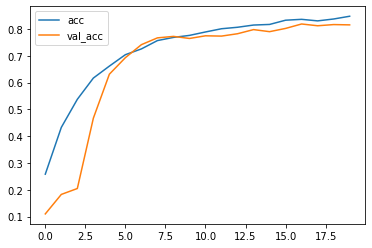

In [567]:
accuracies = pd.DataFrame(model.history.history)
accuracies[['acc','val_acc']].plot()

<AxesSubplot:>

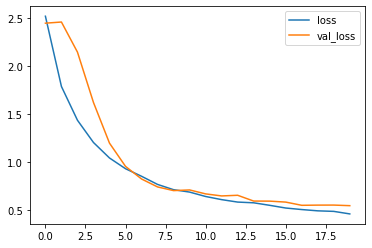

In [556]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [558]:
percent_p = model.predict(X_test)

prediction:
Desk : 64.31 %
Table : 33.35 %
Sofa : 1.4 %
Bed : 0.52 %
Night Stand : 0.31 %
actual: Desk


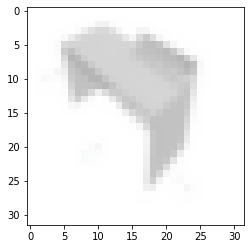

In [559]:
i3 = 300
img = plt.imshow(X_test[i3])
l_index = [0,1,2,3,4,5,6,7,8,9]
x = percent_p[i3]

for i in range(10):
  for j in range(10):
    if x[l_index[i]] > x[l_index[j]]:
      t = l_index[i]
      l_index[i] = l_index[j]
      l_index[j] = t
print('prediction:')
for r in range(5):
  print(classes_list[l_index[r]], ':', round(x[l_index[r]] * 100, 2), '%')

print('actual:', classes_list[y_test[i3]])

In [560]:
predictions = model.predict_classes(X_test)

In [561]:
cm_2d = confusion_matrix(y_test, predictions)

In [562]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


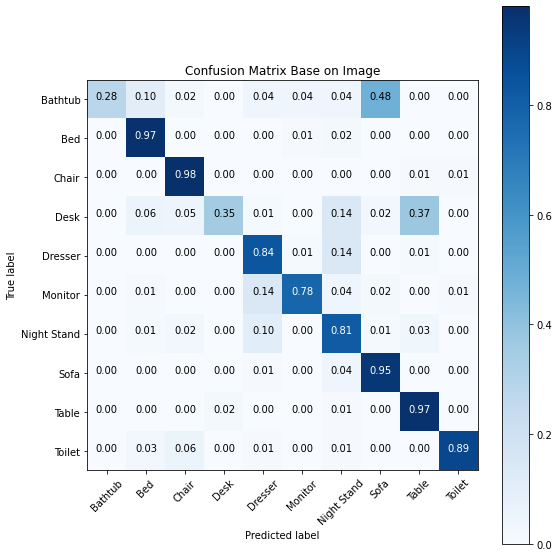

In [563]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_2d, classes_list, normalize=True, title="Confusion Matrix Base on Image")

In [564]:
check = np.array(y_test) == np.array(predictions)
total_accuracy = list(check).count(True)/len(list(check))
acc_img_test = round(total_accuracy*100,2)
print("Accuracy:", acc_img_test,"%")

Accuracy: 81.5 %


# Classification base on point cloud

### This work was based on [PointNet by Nikita Karaev](https://github.com/nikitakaraevv/pointnet).

In [314]:
class PointSampler(object):
    def __init__(self, output_size):
        assert isinstance(output_size, int)
        self.output_size = output_size
    
    def triangle_area(self, pt1, pt2, pt3):
        side_a = np.linalg.norm(pt1 - pt2)
        side_b = np.linalg.norm(pt2 - pt3)
        side_c = np.linalg.norm(pt3 - pt1)
        s = 0.5 * ( side_a + side_b + side_c)
        return max(s * (s - side_a) * (s - side_b) * (s - side_c), 0)**0.5

    def sample_point(self, pt1, pt2, pt3):
        # barycentric coordinates on a triangle
        # https://mathworld.wolfram.com/BarycentricCoordinates.html
        s, t = sorted([random.random(), random.random()])
        f = lambda i: s * pt1[i] + (t-s)*pt2[i] + (1-t)*pt3[i]
        return (f(0), f(1), f(2))
        
    
    def __call__(self, mesh):
        verts, faces = mesh
        verts = np.array(verts)
        areas = np.zeros((len(faces)))

        for i in range(len(areas)):
            areas[i] = (self.triangle_area(verts[faces[i][0]],
                                           verts[faces[i][1]],
                                           verts[faces[i][2]]))
            
        sampled_faces = (random.choices(faces, 
                                      weights=areas,
                                      cum_weights=None,
                                      k=self.output_size))
        
        sampled_points = np.zeros((self.output_size, 3))

        for i in range(len(sampled_faces)):
            sampled_points[i] = (self.sample_point(verts[sampled_faces[i][0]],
                                                   verts[sampled_faces[i][1]],
                                                   verts[sampled_faces[i][2]]))
        
        return sampled_points

In [317]:
class Tnet(nn.Module):
    def __init__(self, k=3):
        super().__init__()
        self.k=k
        self.conv1 = nn.Conv1d(k,64,1)
        self.conv2 = nn.Conv1d(64,128,1)
        self.conv3 = nn.Conv1d(128,1024,1)
        self.fc1 = nn.Linear(1024,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,k*k)

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
        self.bn4 = nn.BatchNorm1d(512)
        self.bn5 = nn.BatchNorm1d(256)


    def forward(self, input):
        # input.shape == (bs,n,3)
        bs = input.size(0)
        xb = F.relu(self.bn1(self.conv1(input)))
        xb = F.relu(self.bn2(self.conv2(xb)))
        xb = F.relu(self.bn3(self.conv3(xb)))
        pool = nn.MaxPool1d(xb.size(-1))(xb)
        flat = nn.Flatten(1)(pool)
        xb = F.relu(self.bn4(self.fc1(flat)))
        xb = F.relu(self.bn5(self.fc2(xb)))

        #initialize as identity
        init = torch.eye(self.k, requires_grad=True).repeat(bs,1,1)
        if xb.is_cuda:
            init=init.cuda()
        matrix = self.fc3(xb).view(-1,self.k,self.k) + init
        return matrix


class Transform(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_transform = Tnet(k=3)
        self.feature_transform = Tnet(k=64)
        self.conv1 = nn.Conv1d(3,64,1)

        self.conv2 = nn.Conv1d(64,128,1)
        self.conv3 = nn.Conv1d(128,1024,1)


        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)

    def forward(self, input):
        matrix3x3 = self.input_transform(input)
        # batch matrix multiplication
        xb = torch.bmm(torch.transpose(input,1,2), matrix3x3).transpose(1,2)

        xb = F.relu(self.bn1(self.conv1(xb)))

        matrix64x64 = self.feature_transform(xb)
        xb = torch.bmm(torch.transpose(xb,1,2), matrix64x64).transpose(1,2)

        xb = F.relu(self.bn2(self.conv2(xb)))
        xb = self.bn3(self.conv3(xb))
        xb = nn.MaxPool1d(xb.size(-1))(xb)
        output = nn.Flatten(1)(xb)
        return output, matrix3x3, matrix64x64

class PointNet(nn.Module):
    def __init__(self, classes = 10):
        super().__init__()
        self.transform = Transform()
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, classes)
        

        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        xb, matrix3x3, matrix64x64 = self.transform(input)
        xb = F.relu(self.bn1(self.fc1(xb)))
        xb = F.relu(self.bn2(self.dropout(self.fc2(xb))))
        output = self.fc3(xb)
        return self.logsoftmax(output), matrix3x3, matrix64x64

In [318]:
class Normalize(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        
        norm_pointcloud = pointcloud - np.mean(pointcloud, axis=0) 
        norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=1))

        return  norm_pointcloud
class ToTensor(object):
    def __call__(self, pointcloud):
        #assert len(pointcloud.shape)==2

        return torch.from_numpy(pointcloud)
def default_transforms():
    return transforms.Compose([
                                PointSampler(1024),
                                Normalize(),
                                ToTensor()
                              ])

In [319]:
class PointCloudData(Dataset):
    def __init__(self, root_dir, valid=False, folder="train", transform=default_transforms()):
        self.root_dir = root_dir
        folders = [dir for dir in sorted(os.listdir(root_dir)) if os.path.isdir(root_dir/dir)]
        self.classes = {folder: i for i, folder in enumerate(folders)}
        self.transforms = transform if not valid else default_transforms()
        self.valid = valid
        self.files = []
        for category in self.classes.keys():
            new_dir = root_dir/Path(category)/folder
            for file in os.listdir(new_dir):
                if file.endswith('.off'):
                    sample = {}
                    sample['pcd_path'] = new_dir/file
                    sample['category'] = category
                    self.files.append(sample)

    def __len__(self):
        return len(self.files)

    def __preproc__(self, file):
        verts, faces = read_off(file)
        if self.transforms:
            pointcloud = self.transforms((verts, faces))
        return pointcloud

    def __getitem__(self, idx):
        pcd_path = self.files[idx]['pcd_path']
        category = self.files[idx]['category']
        with open(pcd_path, 'r') as f:
            pointcloud = self.__preproc__(f)
        return {'pointcloud': pointcloud, 
                'category': self.classes[category]}

In [320]:
valid_ds = PointCloudData(path, valid=True, folder='test')
valid_loader = DataLoader(dataset=valid_ds, batch_size=64)

In [321]:
pointnet = PointNet()
pointnet.load_state_dict(torch.load('Z:\Comp Projects\ML\PointNet.pth'))

<All keys matched successfully>

In [322]:
pointnet.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for i, data in enumerate(valid_loader):
        print('Batch [%4d / %4d]' % (i+1, len(valid_loader)))
        
        inputs, labels = data['pointcloud'].float(), data['category']
        outputs, __, __ = pointnet(inputs.transpose(1,2))
        _, preds = torch.max(outputs.data, 1)
        all_preds += list(preds.numpy())
        all_labels += list(labels.numpy())

Batch [   1 /   15]
Batch [   2 /   15]
Batch [   3 /   15]
Batch [   4 /   15]
Batch [   5 /   15]
Batch [   6 /   15]
Batch [   7 /   15]
Batch [   8 /   15]
Batch [   9 /   15]
Batch [  10 /   15]
Batch [  11 /   15]
Batch [  12 /   15]
Batch [  13 /   15]
Batch [  14 /   15]
Batch [  15 /   15]


In [395]:
cm_3d = confusion_matrix(all_labels, all_preds)

Normalized confusion matrix


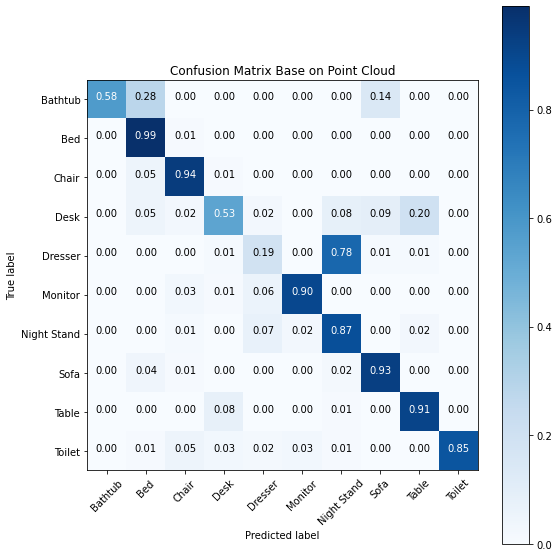

In [396]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_3d, classes_list, normalize=True, title="Confusion Matrix Base on Point Cloud")

In [422]:
check = np.array(all_labels) == np.array(all_preds)
total_accuracy = list(check).count(True)/len(list(check))
acc_pc_test = round(total_accuracy*100,2)
print("Accuracy:", acc_pc_test,"%")

Accuracy: 79.07 %


# Classification on self-generated data

In [326]:
def open_off(name):
    with open(name, 'r') as f:
        verts, faces = read_off(f)
    return verts, faces

In [327]:
class Normalize_list(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        
        norm_pointcloud = pointcloud - np.mean(pointcloud, axis=0) 
        norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=1))
        n_pointcloud = np.array([norm_pointcloud])
        return  n_pointcloud

In [328]:
def test_transforms():
    return transforms.Compose([
                                PointSampler(1024),
                                Normalize_list(),
                                ToTensor()
                              ])

In [345]:
path = cwd+"/self_generated/test_models/new_design/"
files = [ file_path  for _, _, file_path in os.walk(path)]
print(files[0])

['bathtub_new_01.off', 'bathtub_new_02.off', 'bed_new_01.off', 'bed_new_02.off', 'chair_new_01.off', 'chair_new_02.off', 'desk_new_01.off', 'desk_new_02.off', 'dresser_new_01.off', 'dresser_new_02.off', 'monitor_new_01.off', 'monitor_new_02.off', 'nightstand_new_01.off', 'nightstand_new_02.off', 'sofa_new_01.off', 'sofa_new_02.off', 'table_new_01.off', 'table_new_02.off', 'toilet_new_01.off', 'toilet_new_02.off']


In [347]:
data_path= []
for file in files[0]:
    sample = {}
    sample['pcd_path'] = "Z:/Comp Projects/ML/self_generated/test_models/new_design/"+file
    cat = self_classes[file.split("_")[0]]
    sample['category'] = cat
    data_path.append(sample)

[{'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/bathtub_new_01.off',
  'category': 0},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/bathtub_new_02.off',
  'category': 0},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/bed_new_01.off',
  'category': 1},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/bed_new_02.off',
  'category': 1},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/chair_new_01.off',
  'category': 2},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/chair_new_02.off',
  'category': 2},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/desk_new_01.off',
  'category': 3},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/desk_new_02.off',
  'category': 3},
 {'pcd_path': 'Z:/Comp Projects/ML/self_generated/test_models/new_design/dresser_new_01.off',
  'category': 4},
 {'pcd_pat

In [360]:
def conv_imag_sg(v,f, save_path):    
    i,j,k = np.array(f).T
    x,y,z = np.array(v).T
    data = go.Mesh3d(x=x, y=y, z=z, color='lightgray', i=i,j=j,k=k)
    fig = go.Figure(data=data)
    camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=-0.25, z=-0.175),
        eye=dict(x=-1.25, y=-1.5, z=1.25)
    )
    fig.update_layout(scene_camera=camera)
    fig.update_layout(scene = dict(
                        xaxis = dict(
                             nticks=1,
                             backgroundcolor="rgb(256,256,256)",
                             gridcolor="white",
                             showbackground=True,
                             zerolinecolor="white",),
                        yaxis = dict(
                            nticks=1,
                            backgroundcolor="rgb(256,256,256)",
                            gridcolor="white",
                            showbackground=True,
                            zerolinecolor="white"),
                        zaxis = dict(
                            nticks=1,
                            backgroundcolor="rgb(256,256,256)",
                            gridcolor="white",
                            showbackground=True,
                            zerolinecolor="white",),),
                        width=700,
                        margin=dict(
                        r=0, l=0,
                        b=0, t=0)
                      )
    fig.write_image(save_path)
    #img_bytes = fig.to_image(format="png")
    #fig.show()

In [363]:
sg_img = "Z:/Comp Projects/ML/self_generated/test_pictures/"

In [361]:
for i in enumerate(data_path):
    file_path = data_path[i[0]]['pcd_path']
    with open(file_path, 'r') as f:
            v, f = read_off(f)
    name= "Picture_"+str(data_path[i[0]]['category'])+"_"+str(i[0])+".png"
    save_path=sg_img+name
    #print(name)
    conv_imag_sg(v,f,save_path)

In [377]:
all_images = np.array([f for f in os.listdir(sg_img)if os.path.isfile(os.path.join(sg_img, f))])
X_sg = []
y_sg = []
i=1

for image in all_images:
    print('Progress [%4d / %4d]' % (i, len(all_images)))
    image_split=image.split("_")
    img = plt.imread(sg_img+image)
    resize_img = resize(img, (32,32))
    X_sg.append(resize_img)
    y_sg.append(image_split[1])
    i=i+1
    
X_sg = np.array(X_sg)
y_sg = np.array(list(map(int, y_sg)))
y_sg_cat = to_categorical(y_sg)

Progress [   1 /   20]
Progress [   2 /   20]
Progress [   3 /   20]
Progress [   4 /   20]
Progress [   5 /   20]
Progress [   6 /   20]
Progress [   7 /   20]
Progress [   8 /   20]
Progress [   9 /   20]
Progress [  10 /   20]
Progress [  11 /   20]
Progress [  12 /   20]
Progress [  13 /   20]
Progress [  14 /   20]
Progress [  15 /   20]
Progress [  16 /   20]
Progress [  17 /   20]
Progress [  18 /   20]
Progress [  19 /   20]
Progress [  20 /   20]


In [392]:
percent_p_sg = model.predict(X_sg)
predictions_sg = model.predict_classes(X_sg)

In [339]:
generated_data = []
for i in enumerate(data_path):
    sample = {}
    path = data_path[i[0]]['pcd_path']
    verts, faces = open_off(path)
    pointcloud = test_transforms()((verts,faces)).float()
    sample['pointcloud'] = pointcloud
    sample['category'] = data_path[i[0]]['category']
    generated_data.append(sample)

In [342]:
y_new=[]
y_hat_new=[]
comf_level=[]
for i in enumerate(generated_data):
    print('Progress [%4d / %4d]' % (i[0]+1, len(generated_data)))
    input_data=generated_data[i[0]]["pointcloud"]
    output,_,_=pointnet(input_data.transpose(1,2))
    percent,prediction=torch.max(output.data, 1)
    y_new.append(generated_data[i[0]]['category'])
    y_hat_new.append(prediction.numpy()[0])
    comf_level.append(percent.numpy()[0])

Progress [   1 /   20]
Progress [   2 /   20]
Progress [   3 /   20]
Progress [   4 /   20]
Progress [   5 /   20]
Progress [   6 /   20]
Progress [   7 /   20]
Progress [   8 /   20]
Progress [   9 /   20]
Progress [  10 /   20]
Progress [  11 /   20]
Progress [  12 /   20]
Progress [  13 /   20]
Progress [  14 /   20]
Progress [  15 /   20]
Progress [  16 /   20]
Progress [  17 /   20]
Progress [  18 /   20]
Progress [  19 /   20]
Progress [  20 /   20]


In [565]:
i4 = 4
name=data_path[i4]['pcd_path']
verts, faces = open_off(name)
i,j,k = np.array(faces).T
x,y,z = np.array(verts).T
with torch.no_grad():
    test_input = test_transforms()((verts,faces)).float()
    output,_,_=pointnet(test_input.transpose(1,2))
    percent,prediction=torch.sort(output.data, 1,True)
    pointcloud = PointSampler(3000)((verts, faces))
    x=pointcloud.T[0]
    y=pointcloud.T[1]
    z=pointcloud.T[2]
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers')])
    fig.update_traces(marker=dict(size=2, line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
    fig.show()
    
    print("The prediction based on point cloud is:")
    for i in range(5):
        print(classes_list[prediction[0][i]],":", round(exp(percent[0][i].item())*100,2),"%")
    l_index = [0,1,2,3,4,5,6,7,8,9]
    x = percent_p_sg[i4]
    print("---------------------------------------------")
    for i in range(10):
      for j in range(10):
        if x[l_index[i]] > x[l_index[j]]:
          t = l_index[i]
          l_index[i] = l_index[j]
          l_index[j] = t
    print('The prediction based on image is:')
    for r in range(5):
      print(classes_list[l_index[r]], ':', round(x[l_index[r]] * 100, 2), '%')
    print("---------------------------------------------")
    print('Ground Truth:', classes_list[y_sg[i4]])

The prediction based on point cloud is:
Dresser : 36.82 %
Monitor : 20.33 %
Night Stand : 17.8 %
Desk : 10.38 %
Sofa : 4.36 %
---------------------------------------------
The prediction based on image is:
Monitor : 59.76 %
Bed : 27.3 %
Night Stand : 5.88 %
Bathtub : 3.03 %
Dresser : 1.6 %
---------------------------------------------
Ground Truth: Chair


In [557]:
check = np.array(y_new) == np.array(y_hat_new)
total_accuracy = list(check).count(True)/len(list(check))
acc_pc_sg = round(total_accuracy*100,2)
check_sg = np.array(y_sg) == np.array(predictions_sg)
total_accuracy_sg = list(check_sg).count(True)/len(list(check_sg))
acc_img_sg = round(total_accuracy_sg*100,2)
print("Point Cloud Accuracy:", acc_pc_sg,"%")
print("Image Accuracy:", acc_img_sg,"%")

Point Cloud Accuracy: 45.0 %
Image Accuracy: 35.0 %


# Result

Normalized confusion matrix
Normalized confusion matrix


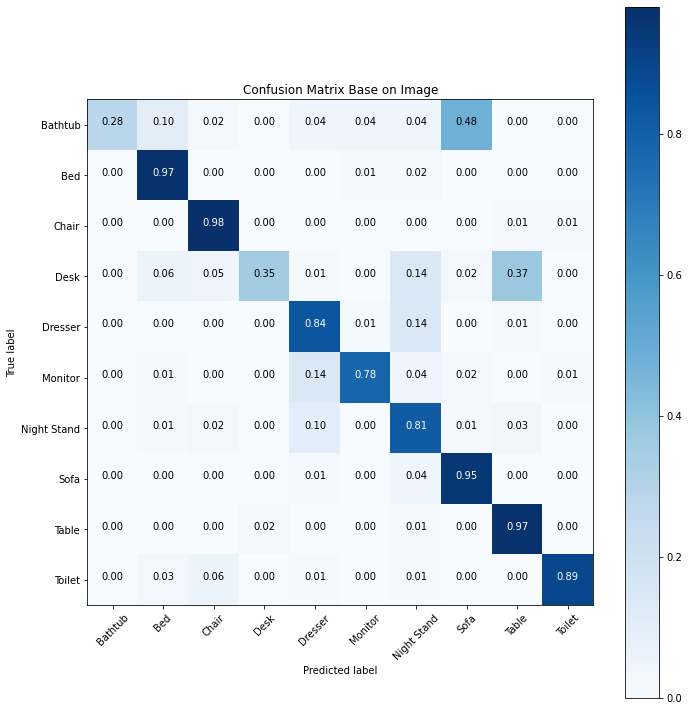

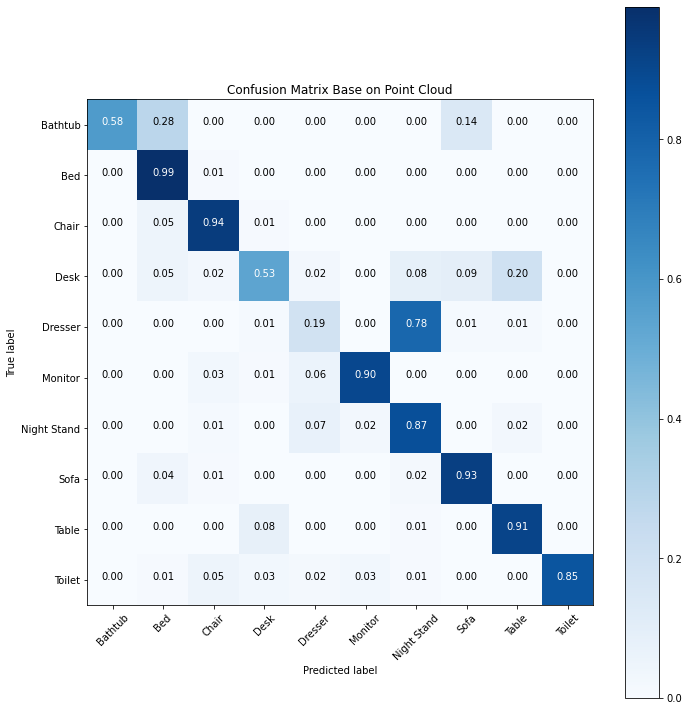

In [566]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_2d, classes_list, normalize=True, title="Confusion Matrix Base on Image")
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_3d, classes_list, normalize=True, title="Confusion Matrix Base on Point Cloud")

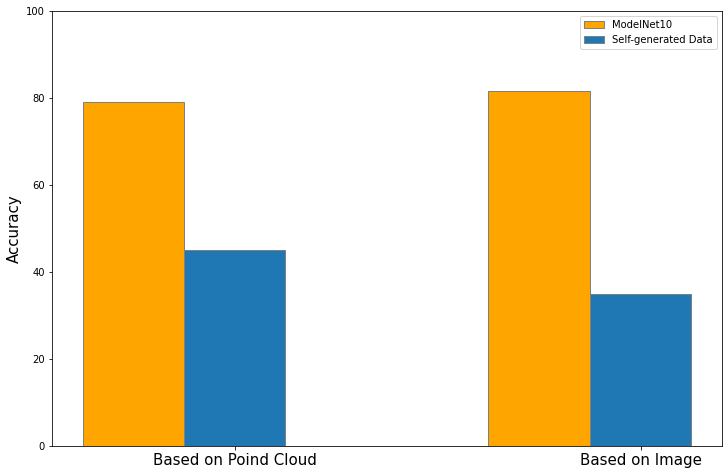

In [519]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
IT = [acc_pc_test, acc_img_test]
ECE = [acc_pc_sg, acc_img_sg]
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br1, IT, color ='orange', width = barWidth,
        edgecolor ='grey', label ='ModelNet10')
plt.bar(br2, ECE, width = barWidth,
        edgecolor ='grey', label ='Self-generated Data')
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Based on Poind Cloud', 'Based on Image'], fontsize = 15)
plt.ylim([0, 100])
plt.legend()
plt.show()

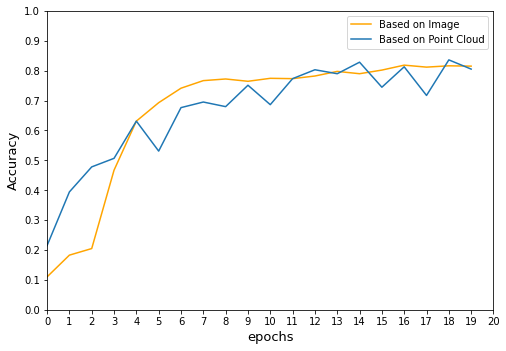

In [621]:
plt.figure(figsize=(8,5.5))
image_y = np.array(accuracies["val_acc"])
pn = pd.read_csv("Z:\Comp Projects\ML\PointNet_history.csv")
pn_y = np.array(pn["val_sparse_categorical_accuracy"])
plt.plot(image_y, color="orange",label="Based on Image")
plt.plot(pn_y, label="Based on Point Cloud")
plt.xticks(np.arange(0, len(image_y)+1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Accuracy', fontsize = 13)
plt.xlabel('epochs', fontsize = 13)
plt.ylim([0, 1])
plt.xlim([0, 20])
plt.legend()
plt.show()